#Regréssion avec Keras

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel('/content/base_a_traiter.xlsx')

In [ ]:
df

,Compagnie,Total d'escales,Destination,Distance,Date_aller,Date_retour,Prix,Duree de vol
0,Air France,0,Oslo,1344.00,2022-04-01,2022-04-08,204,2.333333
1,Air France,0,Oslo,1344.00,2022-04-01,2022-04-08,204,2.500000
2,Flyr AS,0,Oslo,1344.00,2022-04-01,2022-04-08,195,2.416667
3,Flyr AS,0,Oslo,1344.00,2022-04-01,2022-04-08,195,2.416667
4,Norwegian,0,Oslo,1344.00,2022-04-01,2022-04-08,186,2.333333
...,...,...,...,...,...,...,...,...
73273,Iberia,0,Londres,342.76,2022-09-23,2022-09-30,117,1.333333
73274,easyJet,0,Londres,342.76,2022-09-23,2022-09-30,153,1.166667
73275,Air France,0,Londres,342.76,2022-09-23,2022-09-30,153,1.416667
73276,British Airways,0,Londres,342.76,2022-09-23,2022-09-30,159,1.333333


On crée les variables month, year et week

In [ ]:
df['month'] = df['Date_aller'].apply(lambda date:date.month)

In [ ]:
df['year'] = df['Date_aller'].apply(lambda date:date.year)

In [ ]:
df['Week'] = df['Date_aller'].apply(lambda date:date.week)

In [ ]:
len(df)*0.05

3663.9

In [ ]:
# On supprime les top 5% de prix les plus élévés
df= df.sort_values('Prix', ascending= False).iloc[3664:]

Nous avons extrait de la variable "Date_aller" ("Date_retour") l'information qui nous intéressait, nous pouvons donc la supprimer.

In [ ]:
df = df.drop('Date_aller',axis=1)
df= df.drop('Date_retour', axis=1)

In [ ]:
df.dtypes

Compagnie           object
Total d'escales      int64
Destination         object
Distance           float64
Prix                 int64
Duree de vol       float64
month                int64
year                 int64
Week                 int64
dtype: object

In [ ]:
X=pd.get_dummies(df['Compagnie'])
X.shape

(69614, 39)

In [ ]:
X

,Aegean Airlines,Iberia Express,Nordwind Airlines,Aegean Airlines,Aeroflot,Air Europa,Air France,Air Malta,Air Serbia,AnadoluJet,Austrian Airlines,British Airways,Brussels Airlines,Bulgaria Air,Czech Airlines,Eurowings,Finnair,Flyr AS,ITA Airways,Iberia,KLM,LOT,Lufthansa,Luxair,Norwegian,Pegasus Airlines,Plusieurs compagnies,Ryanair,SAS,SWISS,Sky Express,Smartwings,TAP AIR PORTUGAL,Transavia,Turkish Airlines,Volotea,Vueling,airBaltic,easyJet
9428,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10708,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10707,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10706,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10705,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32057,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
22559,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
22558,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
26389,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df= pd.concat([df,X], axis=1)

In [ ]:
df

,Compagnie,Total d'escales,Destination,Distance,Prix,Duree de vol,month,year,Week,Aegean Airlines,Iberia Express,Nordwind Airlines,Aegean Airlines,Aeroflot,Air Europa,Air France,Air Malta,Air Serbia,AnadoluJet,Austrian Airlines,British Airways,Brussels Airlines,Bulgaria Air,Czech Airlines,Eurowings,Finnair,Flyr AS,ITA Airways,Iberia,KLM,LOT,Lufthansa,Luxair,Norwegian,Pegasus Airlines,Plusieurs compagnies,Ryanair,SAS,SWISS,Sky Express,Smartwings,TAP AIR PORTUGAL,Transavia,Turkish Airlines,Volotea,Vueling,airBaltic,easyJet
9428,Aeroflot,0,Moscou,2486.34,580,4.000000,4,2022,14,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10708,Aeroflot,0,Moscou,2486.34,580,4.000000,4,2022,17,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10707,Air France,0,Moscou,2486.34,580,4.000000,4,2022,17,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10706,Aeroflot,0,Moscou,2486.34,580,4.000000,4,2022,17,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10705,Air France,0,Moscou,2486.34,580,4.083333,4,2022,17,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32057,Ryanair,0,Madrid,1054.00,38,2.000000,7,2022,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
22559,Ryanair,0,Madrid,1054.00,33,2.000000,5,2022,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
22558,Ryanair,0,Madrid,1054.00,33,2.083333,5,2022,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
26389,Ryanair,0,Madrid,1054.00,33,2.000000,6,2022,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# On supprime la variable destination(on la variable distance entre les villes)
df= df.drop('Destination', axis=1)

In [ ]:
# On élimine une modalité pour ne pas avoir une colinéarité entre les nouvelles variables crées à partir de Compagnie

df=df.drop('Aegean Airlines', axis=1)

In [ ]:
df= df.drop('Compagnie', axis=1)

In [ ]:
df

,Total d'escales,Distance,Prix,Duree de vol,month,year,Week,Aegean Airlines,Iberia Express,Air Europa,Air France,Air Malta,Air Serbia,AnadoluJet,Austrian Airlines,British Airways,Brussels Airlines,Czech Airlines,Eurowings,Finnair,Flyr AS,ITA Airways,Iberia,KLM,LOT,Lufthansa,Luxair,Norwegian,Pegasus Airlines,Plusieurs compagnies,Ryanair,SAS,SWISS,Sky Express,TAP AIR PORTUGAL,Transavia,Turkish Airlines,Volotea,Vueling,airBaltic,easyJet
53998,1,2095.52,282,4.583333,4,2022,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9969,1,2486.34,282,12.416667,4,2022,15,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9968,1,2486.34,282,6.000000,4,2022,15,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29889,0,1054.00,282,2.083333,6,2022,24,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31677,0,1054.00,282,2.083333,6,2022,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32057,0,1054.00,38,2.000000,7,2022,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
22559,0,1054.00,33,2.000000,5,2022,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
22558,0,1054.00,33,2.083333,5,2022,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
26389,0,1054.00,33,2.000000,6,2022,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


## Mise à l'échelle et Répartition Entraînement / Test

In [ ]:
# Séparation features/Label

X = df.drop('Prix',axis=1)
y = df['Prix']

In [ ]:
# On importe train,test,split
from sklearn.model_selection import train_test_split

In [ ]:
#Répartition entraînement/test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

Après avoir fait la répartition de nos données, nous pouvons faire la mise à l'échelle ou scaling. Pour rappel, cette mise à l'échelle est uniquement adaptée à nos données d'entraînement pour éviter toute fuite de données depuis le set de test.

### Mise à l'échelle (Scaling)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# On crée une instance de ce MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
# On rédefinit notre set d'entraînement à échelle 
X_train= scaler.fit_transform(X_train) # adapter le set d'entraînement et le transformer en même temps

In [ ]:
X_test = scaler.transform(X_test) # On adapte à partir de données de test donc pas de .fit qui ferait fuiter des informations

In [ ]:
X_train.shape

(48729, 44)

On a 44 features d'entrée, ça serait donc une bonne chose d'avoir 44 neurones dans notre couche

In [ ]:
X_test.shape

(20885, 44)

## Création du modèle

In [ ]:
from tensorflow.keras.models import Sequential   #on importe le modèle séquentiel
from tensorflow.keras.layers import Dense, Activation  #on importe la couche dense
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()

model.add(Dense(44,activation='relu')) #On copie-colle ce code plusieurs fois pour avoir des couches cachées
model.add(Dense(44,activation='relu')) # et obtenir un réseau de neurone de deep learning
model.add(Dense(44,activation='relu'))
model.add(Dense(44,activation='relu'))


model.add(Dense(1)) # Couche final avec un seul neurone

model.compile(optimizer='adam',loss='mse') #On utilise l'optimizer adam


## Entraînement du modèle

In [ ]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400) #On nourrit notre data_set par batch de données d'entraînements
                                     # On fixe les epochs à 400
                                     #epoch=temps d'entraînement

Epoch 1/400
381/381 [==============================] - 2s 3ms/step - loss: 18422.4102 - val_loss: 7392.2368
Epoch 2/400
381/381 [==============================] - 1s 3ms/step - loss: 7173.1172 - val_loss: 7106.6577
Epoch 3/400
381/381 [==============================] - 1s 3ms/step - loss: 6973.9727 - val_loss: 6981.2554
Epoch 4/400
381/381 [==============================] - 1s 3ms/step - loss: 6858.5083 - val_loss: 6932.0190
Epoch 5/400
381/381 [==============================] - 1s 3ms/step - loss: 6779.4634 - val_loss: 6822.0054
Epoch 6/400
381/381 [==============================] - 1s 2ms/step - loss: 6704.5547 - val_loss: 6746.6831
Epoch 7/400
381/381 [==============================] - 1s 3ms/step - loss: 6628.1807 - val_loss: 6695.4341
Epoch 8/400
381/381 [==============================] - 1s 3ms/step - loss: 6571.4204 - val_loss: 6608.7310
Epoch 9/400
381/381 [==============================] - 1s 2ms/step - loss: 6513.0811 - val_loss: 6567.5742
Epoch 10/400
381/381 [==============

In [ ]:
#Nous explorons l'historique de notre model
model.history.history

{'loss': [18422.41015625,
  7173.1171875,
  6973.97265625,
  6858.50830078125,
  6779.46337890625,
  6704.5546875,
  6628.1806640625,
  6571.42041015625,
  6513.0810546875,
  6458.0361328125,
  6381.70068359375,
  6328.6982421875,
  6293.4560546875,
  6245.607421875,
  6226.171875,
  6203.138671875,
  6181.0322265625,
  6157.04345703125,
  6137.36669921875,
  6101.0009765625,
  6090.0498046875,
  6068.31884765625,
  6038.3564453125,
  6011.80517578125,
  5960.451171875,
  5883.69287109375,
  5757.51171875,
  5656.8828125,
  5586.39453125,
  5520.03125,
  5471.9140625,
  5388.921875,
  5367.75830078125,
  5297.67236328125,
  5273.54931640625,
  5232.009765625,
  5211.830078125,
  5185.98486328125,
  5163.783203125,
  5144.45458984375,
  5141.396484375,
  5128.7119140625,
  5116.17626953125,
  5083.796875,
  5068.17626953125,
  5075.7861328125,
  5071.90576171875,
  5063.26513671875,
  5036.34716796875,
  5045.10205078125,
  5024.53515625,
  5013.56494140625,
  5020.21044921875,
  4997.8

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses
#donne en même temps ma perte sur mes données d'entraînements et mes données de test

,loss,val_loss
0,18422.410156,7392.236816
1,7173.117188,7106.657715
2,6973.972656,6981.255371
3,6858.508301,6932.019043
4,6779.463379,6822.005371
...,...,...
395,4321.274902,4524.691406
396,4316.918945,4521.621094
397,4310.860352,4523.111328
398,4305.521484,4558.280273


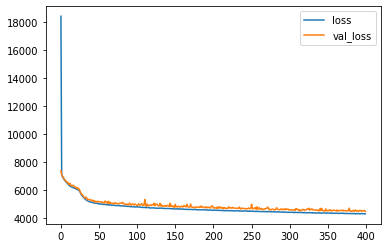

In [ ]:
losses.plot()

#On peut comparer directement le comportement de ma fonction de perte d'entraînement et de test

Nous observons un même comportement(même décroissance) de ma perte d'entraînement (bleu) et de ma perte de validation(en rouge), donc on est pas en surapprentissage( overfitting).

## Évaluation sur les données Test

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

### Prédiction sur de toutes nouvelles données

In [ ]:
X_test

array([[0.        , 0.33180007, 0.03680982, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.33180007, 0.03680982, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.33180007, 0.2208589 , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.33180007, 0.0398773 , ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 0.46708777, 0.17791411, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.81767884, 0.27607362, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
# On prédit sur le set de test
predictions = model.predict(X_test)

In [ ]:
predictions

array([[ 73.59686],
       [282.7582 ],
       [372.4958 ],
       ...,
       [218.57135],
       [171.20961],
       [187.12367]], dtype=float32)

On a une liste de prédictions et nous allons maintenant comparer cette liste avec une liste de prix réels.

In [ ]:
mean_absolute_error(y_test,predictions)

47.68083613100936

Il semble qu'en moyenne on a un écart de 58€ sur tous les prix de billets d'avion entre la prix prédit et le vrai prix.

In [ ]:
df['Prix'].describe()

count    69614.000000
mean       228.208349
std        116.683917
min         33.000000
25%        146.000000
50%        196.000000
75%        287.000000
max        580.000000
Name: Prix, dtype: float64

In [ ]:
# Part de la variance expliquée par le modèle
explained_variance_score(y_test,predictions)

0.670041823934947

Le premier indicateur pertinent (R^2) est de 67%. 

## Comparaison valeurs réels/valeurs prédites + droite de régression parfaite

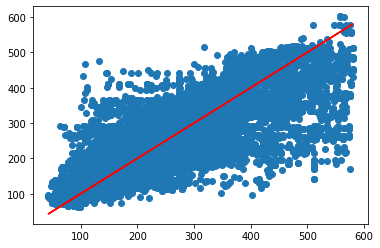

In [ ]:
# Nos prédictions
plt.scatter(y_test,predictions)

# Prédictions parfaites
plt.plot(y_test,y_test,'r');

On observe une bonne correspondance entre les valeurs prédites et les vraies valeurs du prix du billet d'avion sauf pour les valeurs extrêmes